# Import Necessary libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Import Data

In [3]:
zoo_data = pd.read_csv('Zoo.csv')
zoo_data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# Data Understanding

In [4]:
zoo_data.shape

(101, 18)

In [5]:
zoo_data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
zoo_data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [7]:
zoo_data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
corr_matrix = zoo_data.corr().round(2)
corr_matrix

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.00,-0.43,-0.82,0.88,-0.20,-0.47,-0.15,0.49,0.19,0.44,-0.10,-0.28,0.39,0.05,0.21,0.46,-0.56
feathers,-0.43,1.00,0.42,-0.41,0.66,-0.06,-0.10,-0.61,0.23,0.25,-0.15,-0.22,-0.21,0.29,0.03,-0.14,-0.20
eggs,-0.82,0.42,1.00,-0.94,0.38,0.38,0.01,-0.64,-0.34,-0.38,0.10,0.16,-0.22,-0.22,-0.16,-0.51,0.66
milk,0.88,-0.41,-0.94,1.00,-0.37,-0.36,-0.03,0.63,0.38,0.42,-0.24,-0.16,0.21,0.21,0.16,0.57,-0.72
airborne,-0.20,0.66,0.38,-0.37,1.00,-0.17,-0.30,-0.59,-0.10,0.29,0.01,-0.25,0.04,0.01,0.06,-0.35,0.02
aquatic,-0.47,-0.06,0.38,-0.36,-0.17,1.00,0.38,0.05,0.02,-0.64,0.09,0.60,-0.36,-0.03,-0.22,-0.11,0.33
predator,-0.15,-0.10,0.01,-0.03,-0.30,0.38,1.00,0.13,0.05,-0.26,0.12,0.19,-0.10,0.02,-0.31,0.14,0.06
toothed,0.49,-0.61,-0.64,0.63,-0.59,0.05,0.13,1.00,0.58,-0.07,-0.06,0.36,-0.19,0.31,0.07,0.34,-0.47
backbone,0.19,0.23,-0.34,0.38,-0.10,0.02,0.05,0.58,1.00,0.21,-0.25,0.21,-0.43,0.73,0.10,0.36,-0.83
breathes,0.44,0.25,-0.38,0.42,0.29,-0.64,-0.26,-0.07,0.21,1.00,-0.12,-0.62,0.37,0.09,0.12,0.20,-0.52


<AxesSubplot:>

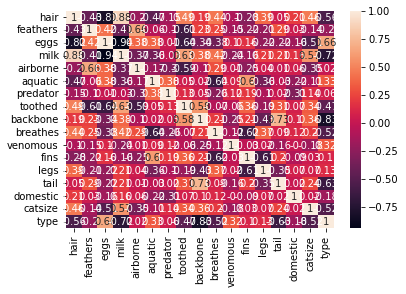

In [9]:
sns.heatmap(corr_matrix,annot=True)

<Figure size 1440x1440 with 0 Axes>

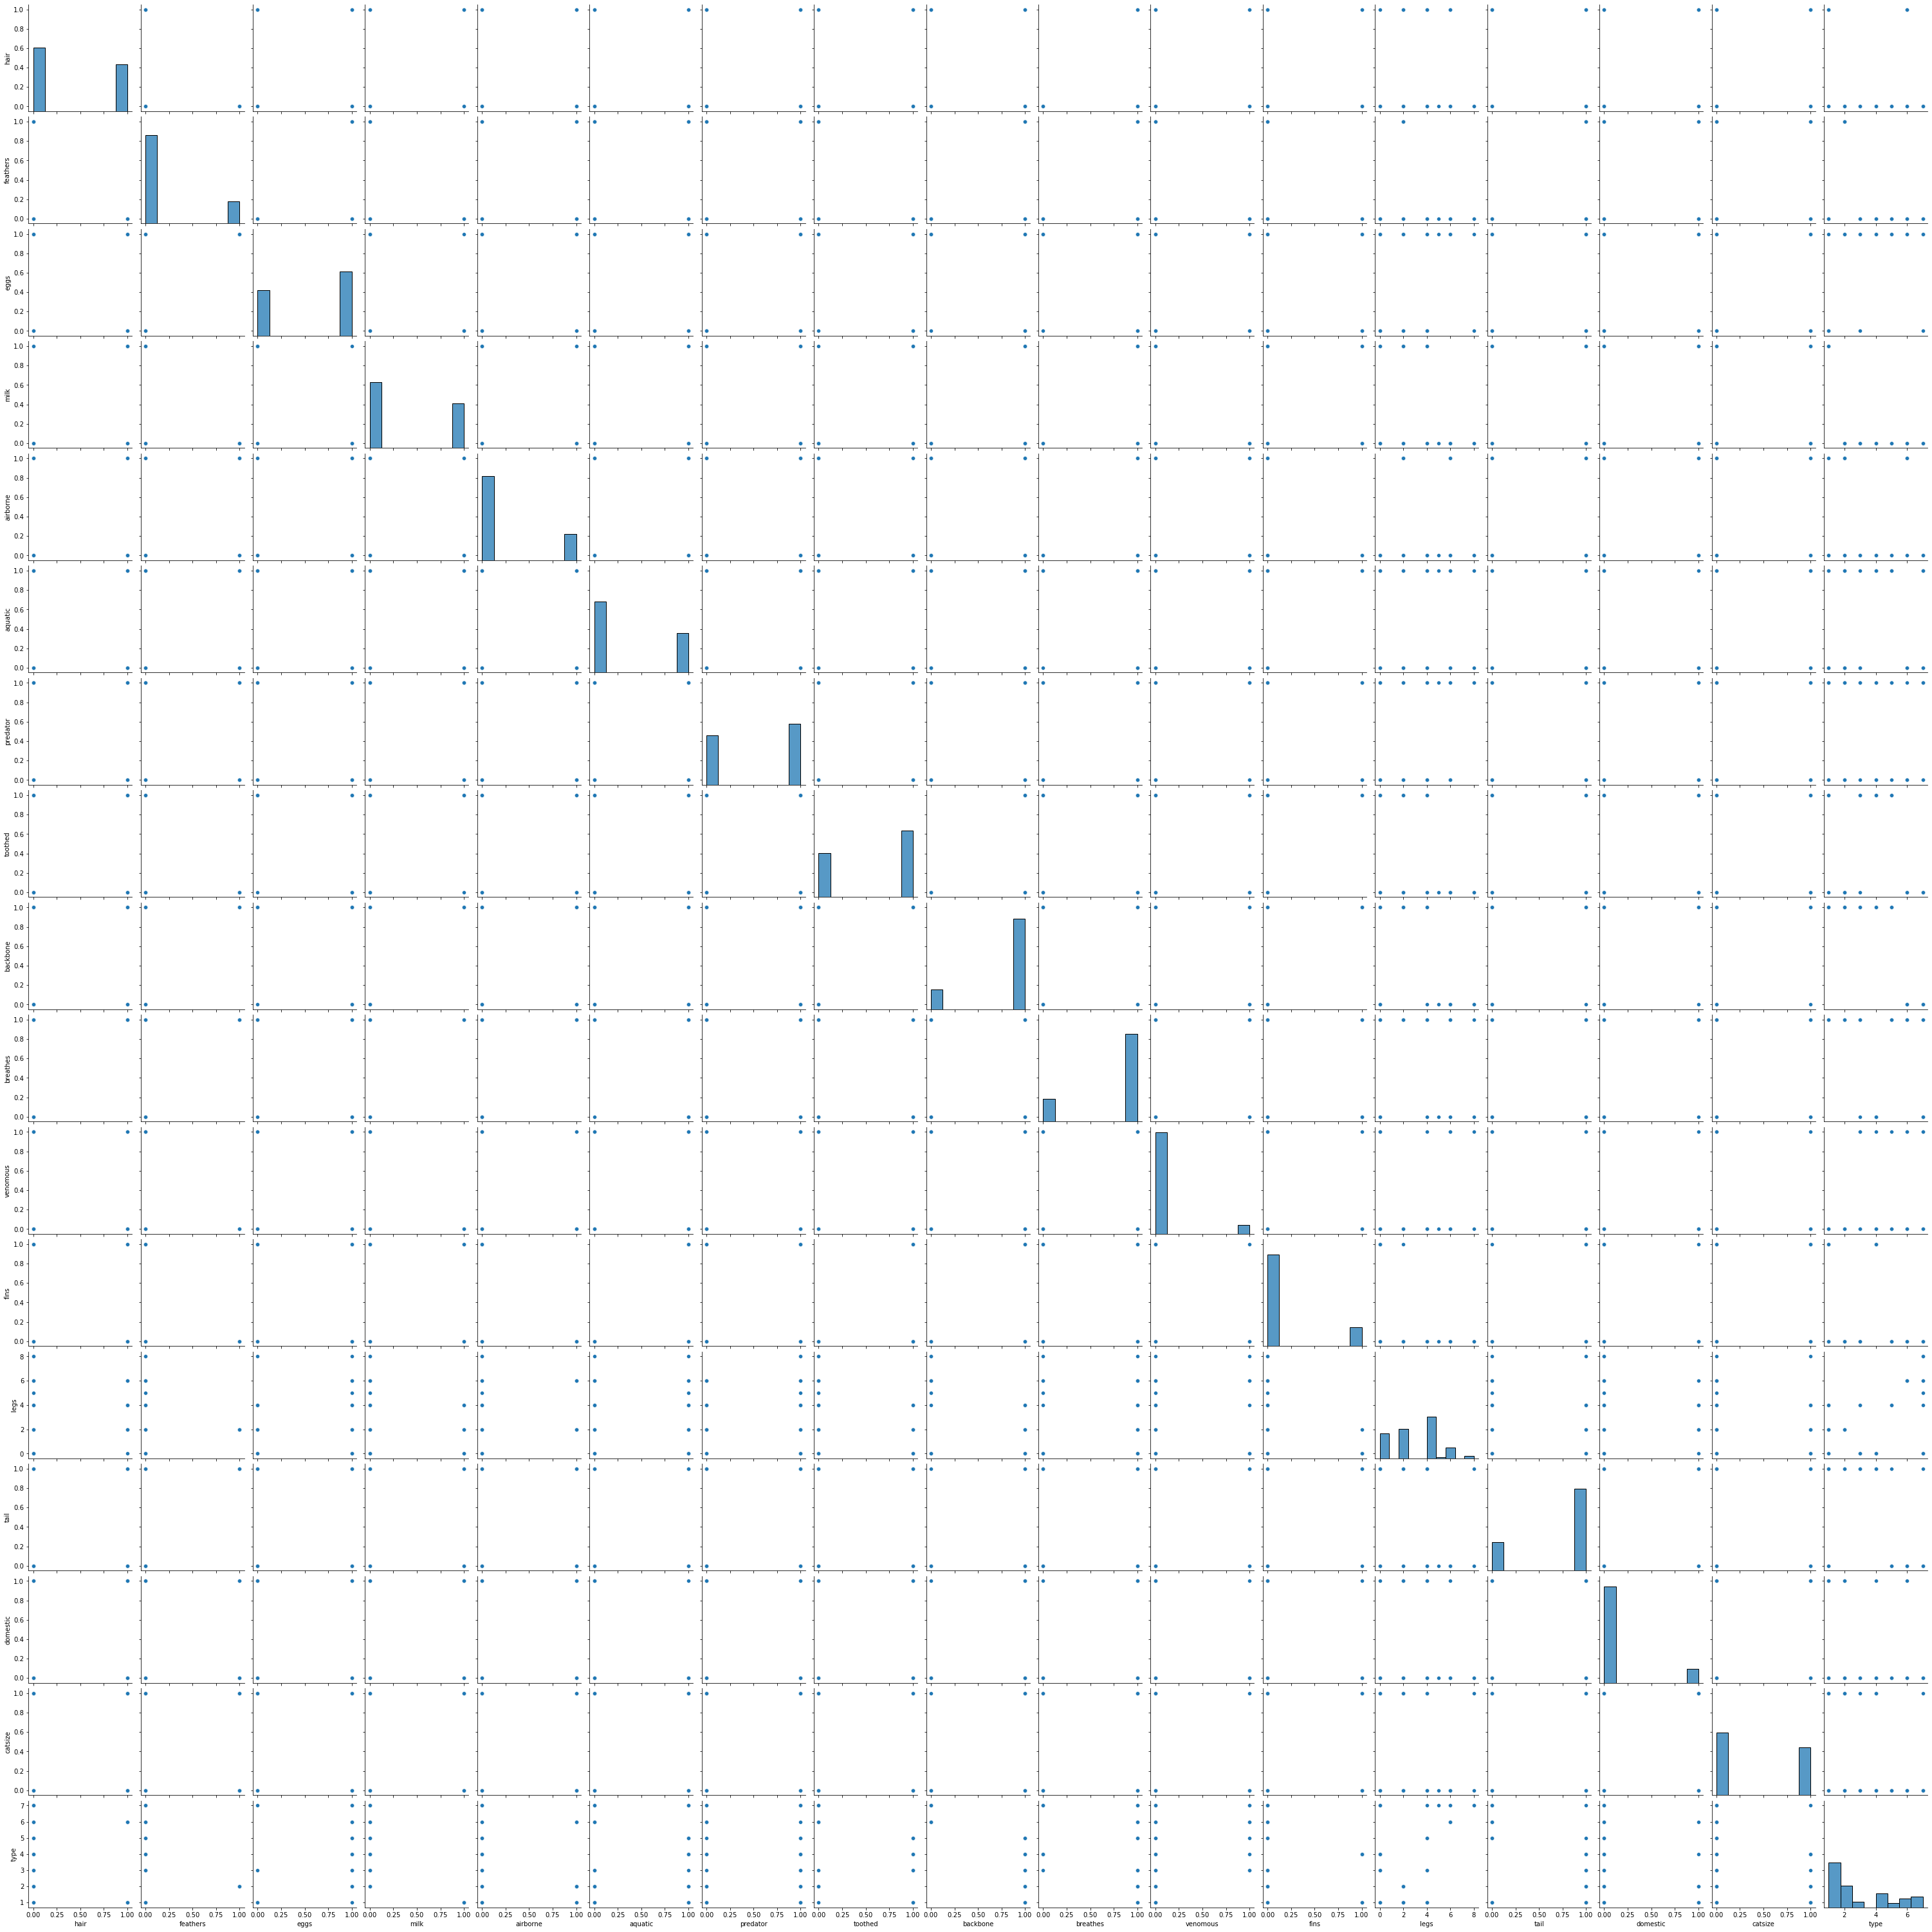

In [11]:
plt.figure(figsize=(20,20))
sns.pairplot(data=zoo_data)
plt.show()

# Data Preparation

In [12]:
del zoo_data['animal name']

In [13]:
X = zoo_data.drop('type',axis=1)
y = zoo_data[['type']]

In [14]:
X.shape,y.shape

((101, 16), (101, 1))

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=12)

In [16]:
X_train.shape,y_train.shape

((80, 16), (80, 1))

In [17]:
X_test.shape,y_test.shape

((21, 16), (21, 1))

# Model Training | Model Testing | Model Evaluation

In [18]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

### Training Data

In [19]:
y_pred = knn_model.predict(X_train)
accuracy_score(y_train,y_pred)

0.9375

In [20]:
r2_score(y_train,y_pred).round(3)

0.968

### Testing Data

In [21]:
y_test_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_test_pred)

0.9523809523809523

In [22]:
r2_score(y_test,y_test_pred).round(3)

0.989

# Finding optimanl number for K

In [23]:
container_cv_scores = []

for i in range(1,31):
    knn_model_1 = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(estimator =knn_model_1, X = X,y=y,cv = 5)
    container_cv_scores.append(cv_scores.mean())
container_cv_scores

[0.97,
 0.9199999999999999,
 0.93,
 0.9004761904761904,
 0.8509523809523811,
 0.8509523809523811,
 0.8414285714285714,
 0.8014285714285714,
 0.7919047619047619,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.7419047619047618,
 0.7228571428571429,
 0.7128571428571429,
 0.7028571428571427,
 0.7028571428571427,
 0.7028571428571427,
 0.7028571428571427,
 0.6928571428571428,
 0.6928571428571428,
 0.6128571428571428]

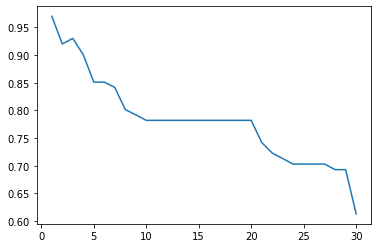

In [24]:
plt.plot(range(1,31),container_cv_scores)
plt.show()

In [25]:
container_cv_scores.index(max(container_cv_scores))

0

# Model building using K=1

In [26]:
knn_model_2 = KNeighborsClassifier(n_neighbors=1)
knn_model_2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
y_pred_2 = knn_model_2.predict(X_train)
accuracy_score(y_train,y_pred_2)

1.0

In [28]:
r2_score(y_train,y_pred_2).round(3)

1.0

In [29]:
y_test_pred_2 = knn_model_2.predict(X_test)
accuracy_score(y_test,y_test_pred_2)

1.0

In [30]:
r2_score(y_test,y_test_pred_2).round(3)

1.0

# Model Deployment

In [31]:
from pickle import dump

In [32]:
dump(knn_model,open('knn_model_2','wb'))

In [33]:
from pickle import load 

In [34]:
loaded_intell = load(open('knn_model_2','rb'))

In [35]:
y_loaded_pred = loaded_intell.predict(X_test)
y_loaded_pred

array([7, 4, 1, 1, 1, 2, 1, 6, 1, 5, 2, 6, 7, 2, 1, 2, 4, 4, 1, 1, 4],
      dtype=int64)

# ==========================================================